In [1]:
import mrob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Plot preparations: 

In [31]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
def plotConfig():
    "configfures the 3d plot structure for representing tranformations"
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    return ax
    
def plotT(T, ax):
    "Plots a 3 axis frame in the origin given the mrob SE3 transformation, right-hand convention"
    # transform 3 axis to the coordinate system
    x = np.zeros((4,3))
    x[0,:] = T.transform(np.array([0,0,0], dtype='float64'))
    x[1,:] = T.transform(np.array([1,0,0], dtype='float64'))
    ax.plot(x[[0,1],0],x[[0,1],1],x[[0,1],2],'r') # X axis
    x[2,:] = T.transform(np.array([0,1,0], dtype='float64'))
    ax.plot(x[[0,2],0],x[[0,2],1],x[[0,2],2],'g') # Y axis
    x[3,:] = T.transform(np.array([0,0,1], dtype='float64'))
    ax.plot(x[[0,3],0],x[[0,3],1],x[[0,3],2],'b') # Z axis
    plt.xlabel('x')
    plt.ylabel('y')

## Create rotation vector and map: 
$$\Large \rm I\!R^3 \rightarrow \rm SO(3)$$

In [32]:
rotation_angles = np.random.rand(3)
R = mrob.geometry.SO3(rotation_angles)

## Create translation vector and build RBT matrix: 
$$\Large \begin{equation*}
T = 
\begin{bmatrix}
R & t \\
0 & 1
\end{bmatrix}
\end{equation*}$$

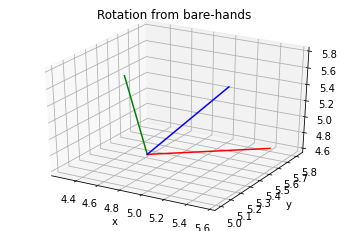

In [33]:
translation_vector = np.array([5, 5, 5])
T = np.eye(4)
T[:3, :3] = R.R()
T[:, 3][:-1] = translation_vector
T = mrob.geometry.SE3(T)

ax = plotConfig()
plotT(T, ax)
plt.title('Rotation from bare-hands')
plt.show()

## Create rotation + translation vector
$$\Large \begin{equation*}
\xi = 
\begin{bmatrix}
\theta_1 \\
\theta_2 \\
\theta_3 \\
\rho_1 \\
\rho_2 \\
\rho_3
\end{bmatrix}
\end{equation*}$$

In [34]:
xi = mrob.geometry.SE3(np.concatenate([rotation_angles, translation_vector]))

### Create RBT matrix, i.e. this mapping:
$$\Large \rm I\!R^6 \rightarrow \rm SE(3)$$
### Inside the .SE3() method, this formula is applied:
$$\Large T = Exp(\xi)$$

In [35]:
T2 = mrob.geometry.SE3(xi)

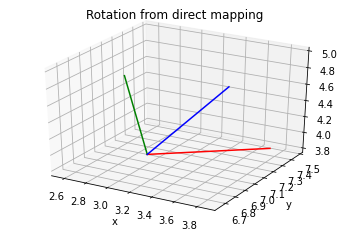

In [36]:
ax = plotConfig()
plotT(T2, ax)
plt.title('Rotation from direct mapping')
plt.show()

## We see, that the translation in T2 doesn't exactly correspond to translation_vector:

In [37]:
print(T.T())
print(" ")
print(T2.T())
print(" ")
print("Both transformations are equivalent:", (T.T() == T2.T()).all()) 

[[ 0.39358079 -0.73556262  0.55139985  5.        ]
 [ 0.81401751  0.55757018  0.16276052  5.        ]
 [-0.42716467  0.38478972  0.81820976  5.        ]
 [ 0.          0.          0.          1.        ]]
 
[[ 0.39358079 -0.73556262  0.55139985  3.3081539 ]
 [ 0.81401751  0.55757018  0.16276052  6.65524068]
 [-0.42716467  0.38478972  0.81820976  4.19712408]
 [ 0.          0.          0.          1.        ]]
 
Both transformations are equivalent: False
